In [96]:
import pandas as pd
import numpy as np
from datascience import *
from datascience import Table
import matplotlib

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

# Project 1: Covid-19 and Exponential Growth

## Table of Contents
<a href='#section 0'>Background Knowledge: Spread of Disease</a>

1.  <a href='#section 1'> The Data Science Life Cycle</a>

    a. <a href='#subsection 1a'>Formulating a question or problem</a> 

    b. <a href='#subsection 1b'>Acquiring and cleaning data</a>

    c. <a href='#subsection 1c'>Conducting exploratory data analysis</a>

    d. <a href='#subsection 1d'>Using prediction and inference to draw conclusions</a>
<br><br>

### Background Knowledge <a id='section 0'></a>


Exponential growth video: https://www.youtube.com/watch?v=MHRQ1UGKRyI&feature=youtu.be

Exponential growth describes a quantity that's changing by some constant factor for every unit of time. For example, a value that is doubling every month is exponential growth. Let's look at this will a rumor. If you hear a rumor and only tell 1 other person each day, then only 11 people will know after 10 days. Now, telling 2 new people may not seem like that much of a difference, but it will end up reaching 1024 people in those 10 day instead of 11. This is exponential growth.
<img src="images/rumor_img.png" width = 500/>

For diseases, different infections spread through populations at different rates. The "basic reproductive number", or R0, is the number of people each infected person is expected to infect if no one has been vaccinated.
<img src="images/linear_v_exp.png" width = 500/>


<img src="images/r0.png" width = 700/>

#### Practice questions

1. If a disease has an R0 of 4, and 100 people come into contact with an infected individual on average, what is the probability that any one friend becomes infected? Hint: look at the middle diagram above.

*Insert your answer here, replacing this text.*

2. How many of the 100 friends would need to be vaccinated to bring the R0 down to 1? (a linear rate instead of an exponential rate)

*Insert your answer here, replacing this text.*

# The Data Science Life Cycle <a id='section 1'></a>

## Formulating a question or problem <a id='subsection 1a'></a>
It is important to ask questions that will be informative and that will avoid misleading results. There are many different questions we could ask about Covid-19, for example, many researchers use data to predict the outcomes based on intervention techniques such as social distancing. https://www.washingtonpost.com/graphics/2020/world/corona-simulator/ 

<div class="alert alert-warning">
<b>Question:</b> Take some time to formulate questions you have about this pandemic and the data you would need to answer the question.
    
   </div>


Your questions: *here*


Data you would need: *here*

## Acquiring and cleaning data <a id='subsection 1b'></a>

We'll be looking at the COVID-19 Data Repository from Johns Hopkins University. You can find the raw data [here](https://github.com/CSSEGISandData/COVID-19). We've cleaned up the datasets a bit, but we will be investigating the number of confirmed cases and the number of new cases in the United States from March to June.

The following table, `confirmed_cases`, contains the number of confirmed cases at the start of each month for every county in the United States.

In [97]:
confirmed_cases = Table().read_table("data/covid_by_county.csv")
confirmed_cases.show(10)

County,State,Combined_Key,3/1/2020,4/1/2020,5/1/2020,6/1/2020
nan,American Samoa,"American Samoa, US",0,0,0,0
nan,Guam,"Guam, US",0,77,145,175
nan,Northern Mariana Islands,"Northern Mariana Islands, US",0,6,14,22
nan,Puerto Rico,"Puerto Rico, US",0,286,1575,3873
nan,Virgin Islands,"Virgin Islands, US",0,30,66,70
Autauga,Alabama,"Autauga, Alabama, US",0,8,42,233
Baldwin,Alabama,"Baldwin, Alabama, US",0,20,175,292
Barbour,Alabama,"Barbour, Alabama, US",0,0,42,172
Bibb,Alabama,"Bibb, Alabama, US",0,3,42,76
Blount,Alabama,"Blount, Alabama, US",0,5,39,63


<div class="alert alert-warning">
<b>Question:</b> It's important to evalute our data source. What do you know about Johns Hopkins University? What motivations do they have for collecting this data?
   </div>

<div class="alert alert-warning">
<b>Question:</b> Do you see any missing (nan) values? Why might they be there?
   </div>

*Insert answer here*

<div class="alert alert-warning">
<b>Question:</b> We want to learn more about the dataset. First, how many total rows are in this table? What does each row represent?
    
   </div>

In [98]:
total_rows = ...

*Insert answer here*

## Conducting exploratory data analysis <a id='subsection 1c'></a>

Visualizations help us to understand what the dataset is telling us. Compare the county with the most confirmed cases on April 1st with the next 9 most confirmed cases in a bar chart. 

<div class="alert alert-warning">
<b>Question:</b> First, sort the dataset to show the counties with the most cases at the top of the table.
   </div>

In [99]:
sorted_cases = ...

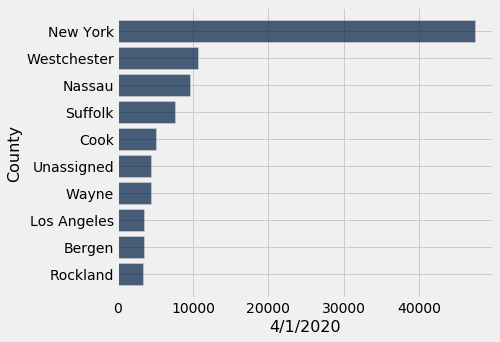

In [100]:
#KEY
top_ten = confirmed_cases.sort("4/1/2020", descending = True).take(np.arange(10))
top_ten.barh("County", "4/1/2020")

<div class="alert alert-warning">
<b>Question:</b> Now, cut down the table to only have the top ten from sorted_cases above.
   </div>

In [101]:
top_ten = ...

<div class="alert alert-warning">
<b>Question:</b> Next, create a bar chart to visualize the comparison between the top_ten counties for the number of cases on April 1st.
   </div>

In [102]:
...

Ellipsis

<div class="alert alert-warning">
<b>Question:</b> Let's look at the counties in California. First, return a table that only has the California counties. Then, select the counties from the table you want to compare to each other. 
   </div>

In [103]:
ca_cases = ...

In [104]:
select_counties = ...

<div class="alert alert-warning">
<b>Question:</b> Now make another bar chart using your selected counties and the number of cases on May 1st.
   </div>

In [105]:
...

Ellipsis

<div class="alert alert-warning">
<b>Question:</b> What are some possible reasons for the disparities in certain counties? Hint: Think about the size of the counties.
   </div>

*Insert answer here.*

A disease will spread more when there are more people in a population to spread to. Let's look at the population of the states to compare the percentages based on the number of people. Here is a table with the states and their populations. 

In [106]:
pop_by_state = Table().read_table("data/pop_by_state.csv")
pop_by_state

State,Population
Alabama,4903185
Alaska,731545
American Samoa,55641
Arizona,7278717
Arkansas,3017804
California,39512223
Colorado,5758736
Connecticut,3565287
Delaware,973764
Diamond Princess,0


<div class="alert alert-warning">
<b>Question:</b> First, group the confirmed cases to show the number of cases for each state and the sum of the cases.
   </div>

In [107]:
grouped_by_state = ...

In [108]:
#KEY
grouped_by_state = confirmed_cases.group("State", sum).drop(1, 2)
grouped_by_state

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum
Alabama,0,1060,7294,18630
Alaska,0,132,364,466
American Samoa,0,0,0,0
Arizona,1,1413,7969,20129
Arkansas,0,584,3337,7443
California,12,9399,52026,114733
Colorado,0,3342,15793,26563
Connecticut,0,3557,28764,42740
Delaware,0,368,4918,9605
District of Columbia,0,586,4658,8857


<div class="alert alert-warning">
<b>Question:</b> Now join this table with the pop_by_state table and add a column called "Percentage" that has the number of cases on 6/1/2020 divided by the population.
   </div>

In [83]:
#Key => will decide how to split up into steps during meeting w Ashley and Karla
with_pop = grouped_by_state.join("State", pop_by_state).with_column("Percentage", with_pop.column("6/1/2020 sum")/with_pop.column("Population"))
with_pop

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
Alabama,0,1060,7294,18630,4903185,0.00379957
Alaska,0,132,364,466,731545,0.000637008
American Samoa,0,0,0,0,55641,0
Arizona,1,1413,7969,20129,7278717,0.00276546
Arkansas,0,584,3337,7443,3017804,0.00246636
California,12,9399,52026,114733,39512223,0.00290373
Colorado,0,3342,15793,26563,5758736,0.00461264
Connecticut,0,3557,28764,42740,3565287,0.0119878
Delaware,0,368,4918,9605,973764,0.00986379
District of Columbia,0,586,4658,8857,705749,0.0125498


In [ ]:
with_pop = ...

In [89]:
#KEY
top_ten_pct = with_pop.sort("Percentage", descending = True).take(np.arange(10))
top_ten_pct

State,3/1/2020 sum,4/1/2020 sum,5/1/2020 sum,6/1/2020 sum,Population,Percentage
New Jersey,0,22255,121190,160918,8882190,0.0181169
Massachusetts,1,7738,64311,100805,6892503,0.0146253
New York,0,83948,308314,371711,26161672,0.0142082
Rhode Island,1,566,8962,14991,1059361,0.014151
District of Columbia,0,586,4658,8857,705749,0.0125498
Connecticut,0,3557,28764,42740,3565287,0.0119878
Delaware,0,368,4918,9605,973764,0.00986379
Illinois,3,6980,56055,121234,12671821,0.00956721
Maryland,0,1986,23472,53327,6045680,0.00882068
Louisiana,0,6424,28711,40341,4648794,0.00867773


In [109]:
top_ten_pct = ...

In [ ]:
...

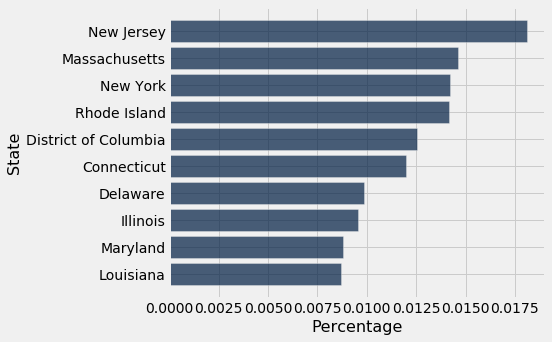

In [90]:
#KEY
top_ten_pct.barh("State", "Percentage")

## Using prediction and inference to draw conclusions <a id='subsection 1a'></a>

Now that we have some experience making these visualizations, let's go back to exponential growth. We know that, without intervention, a disease can behave like a rumor and spread at an alarming rate. From the previous section, we also know that we need to take into account the population of the region when looking at the number of cases in order to get a more accurate percentage instead of just comparing the number of cases. 

Now we will read in two tables: Covid by State and Population by state in order to look at the percentage of the cases. And the growth of the 

In [22]:
covid_by_state = Table().read_table("data/covid_by_state.csv")
covid_by_state.show(5)

Days since 3/1/20,Alabama,Alaska,American Samoa,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,Georgia,Guam,Hawaii,Idaho,Illinois,Indiana,Iowa,Kansas,Kentucky,Louisiana,Maine,Maryland,Massachusetts,Michigan,Minnesota,Mississippi,Missouri,Montana,Nebraska,Nevada,New Hampshire,New Jersey,New Mexico,New York,North Carolina,North Dakota,Northern Mariana Islands,Ohio,Oklahoma,Oregon,Pennsylvania,Puerto Rico,Rhode Island,South Carolina,South Dakota,Tennessee,Texas,Utah,Vermont,Virgin Islands,Virginia,Washington,West Virginia,Wisconsin,Wyoming
0,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,11,0,0,0
1,0,0,0,1,0,21,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,18,0,0,0
2,0,0,0,1,0,25,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,27,0,0,0
3,0,0,0,1,0,35,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,11,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,39,0,0,0
4,0,0,0,1,0,51,2,0,0,0,3,2,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,2,2,0,23,1,0,0,0,0,3,0,0,2,0,0,1,3,0,0,0,0,70,0,0,0


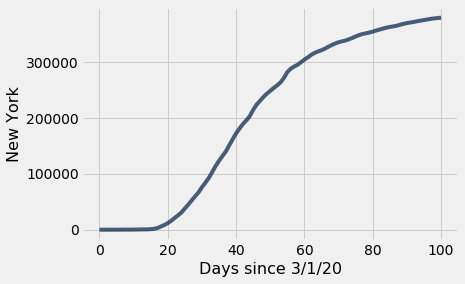

In [25]:
covid_by_state.plot(0, 'New York')

In [27]:
covid_by_state.group("Days since 3/1/20", sum)

Days since 3/1/20,Alabama sum,Alaska sum,American Samoa sum,Arizona sum,Arkansas sum,California sum,Colorado sum,Connecticut sum,Delaware sum,District of Columbia sum,Florida sum,Georgia sum,Guam sum,Hawaii sum,Idaho sum,Illinois sum,Indiana sum,Iowa sum,Kansas sum,Kentucky sum,Louisiana sum,Maine sum,Maryland sum,Massachusetts sum,Michigan sum,Minnesota sum,Mississippi sum,Missouri sum,Montana sum,Nebraska sum,Nevada sum,New Hampshire sum,New Jersey sum,New Mexico sum,New York sum,North Carolina sum,North Dakota sum,Northern Mariana Islands sum,Ohio sum,Oklahoma sum,Oregon sum,Pennsylvania sum,Puerto Rico sum,Rhode Island sum,South Carolina sum,South Dakota sum,Tennessee sum,Texas sum,Utah sum,Vermont sum,Virgin Islands sum,Virginia sum,Washington sum,West Virginia sum,Wisconsin sum,Wyoming sum
0,0,0,0,1,0,12,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,11,0,0,0
1,0,0,0,1,0,21,0,0,0,0,1,0,0,0,0,4,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,18,0,0,0
2,0,0,0,1,0,25,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,2,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,27,0,0,0
3,0,0,0,1,0,35,0,0,0,0,2,2,0,0,0,4,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,2,0,0,11,1,0,0,0,0,3,0,0,2,0,0,0,0,0,0,0,0,39,0,0,0
4,0,0,0,1,0,51,2,0,0,0,3,2,0,0,0,5,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,2,2,0,23,1,0,0,0,0,3,0,0,2,0,0,1,3,0,0,0,0,70,0,0,0
5,0,0,0,2,0,59,8,0,0,0,3,3,0,0,0,5,1,0,0,1,0,0,3,6,0,1,0,0,0,1,2,2,2,0,31,2,0,0,0,0,3,2,0,2,0,0,1,4,0,0,0,0,78,0,0,0
6,0,0,0,4,0,81,8,0,0,0,7,5,0,1,0,6,1,0,0,1,0,0,3,6,0,1,0,0,0,1,2,2,4,0,76,2,0,0,0,1,6,2,0,3,2,0,1,8,1,0,0,0,102,0,0,0
7,0,0,0,4,0,95,8,0,0,0,10,5,0,1,0,7,2,0,1,1,0,0,5,22,0,1,0,1,0,1,4,4,5,0,106,2,0,0,0,1,14,6,0,3,2,0,3,11,1,1,0,2,122,0,0,0
8,0,0,0,4,0,101,12,0,0,0,13,10,0,1,0,7,3,3,1,4,0,0,5,22,0,2,0,1,0,3,4,4,5,0,142,2,0,0,0,1,14,7,0,3,3,0,3,13,1,1,0,2,122,0,0,0
9,0,0,0,6,0,144,17,1,0,0,15,17,0,3,0,12,6,8,1,5,0,0,8,41,0,2,0,1,0,3,4,4,15,0,150,7,0,0,3,2,14,12,0,3,7,0,3,16,2,1,0,8,167,0,3,0


Source: How Math (and Vaccines) Keep You Safe From the Flu by Patrick Honner (Quanta Magazine)